In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import math


In [35]:
data = pd.read_csv("./mpchb.csv")
data

,ATTACK,C1,C2,C3,C4,C5,C6,C7
0,Man-in-the-middle Attack,IPid,FDDI,x25,rangingdistance,NaN,NaN,NaN
1,Phishing and spear phishing attacks,tcpchecksum,mtcp,controlflags,tcpoffset,tcpport,NaN,NaN
2,Drive-by attack,ICMPID,udptraffic,udpunicorn,datagramid,NTP,RIP,TFTP
3,Password attack,GETID,POSTID,openBSD,appid,sessionid,transid,physicalid
4,SQL injection attack,SYN,ACK,synpacket,sycookies,NaN,NaN,NaN
5,Cross-site scripting (XSS) attack,serverattack,serverid,blockbankwidth,NaN,NaN,NaN,NaN
6,Eavesdropping attack,monlist,getmonlist,NTPserver,NaN,NaN,NaN,NaN
7,Birthday attack,portid,FTPID,tryion,fragflag,NaN,NaN,NaN
8,Teardrop attack,malwareid,gethttpid,httpid,NaN,NaN,NaN,NaN


In [36]:
for col in (data.columns.to_list()[1:]):
  data[col] = data[col].str.lower()

In [37]:
data

,ATTACK,C1,C2,C3,C4,C5,C6,C7
0,Man-in-the-middle Attack,ipid,fddi,x25,rangingdistance,NaN,NaN,NaN
1,Phishing and spear phishing attacks,tcpchecksum,mtcp,controlflags,tcpoffset,tcpport,NaN,NaN
2,Drive-by attack,icmpid,udptraffic,udpunicorn,datagramid,ntp,rip,tftp
3,Password attack,getid,postid,openbsd,appid,sessionid,transid,physicalid
4,SQL injection attack,syn,ack,synpacket,sycookies,NaN,NaN,NaN
5,Cross-site scripting (XSS) attack,serverattack,serverid,blockbankwidth,NaN,NaN,NaN,NaN
6,Eavesdropping attack,monlist,getmonlist,ntpserver,NaN,NaN,NaN,NaN
7,Birthday attack,portid,ftpid,tryion,fragflag,NaN,NaN,NaN
8,Teardrop attack,malwareid,gethttpid,httpid,NaN,NaN,NaN,NaN


In [38]:
def vectorize(col_val):
  if col_val is not None:
    # L1
    print(col_val)
    vec = np.array([ord(ch) for ch in col_val.strip()])
    return (vec / vec.sum())
  
  
data = data.fillna("a")

In [39]:
data

,ATTACK,C1,C2,C3,C4,C5,C6,C7
0,Man-in-the-middle Attack,ipid,fddi,x25,rangingdistance,a,a,a
1,Phishing and spear phishing attacks,tcpchecksum,mtcp,controlflags,tcpoffset,tcpport,a,a
2,Drive-by attack,icmpid,udptraffic,udpunicorn,datagramid,ntp,rip,tftp
3,Password attack,getid,postid,openbsd,appid,sessionid,transid,physicalid
4,SQL injection attack,syn,ack,synpacket,sycookies,a,a,a
5,Cross-site scripting (XSS) attack,serverattack,serverid,blockbankwidth,a,a,a,a
6,Eavesdropping attack,monlist,getmonlist,ntpserver,a,a,a,a
7,Birthday attack,portid,ftpid,tryion,fragflag,a,a,a
8,Teardrop attack,malwareid,gethttpid,httpid,a,a,a,a


In [40]:
# data['C1'] = data['C1'].apply(vectorize)

for col in (data.columns.to_list()[1:]):
  data[col] = data[col].apply(vectorize)

 ipid
 tcpchecksum
 icmpid
 getid
 syn
 serverattack
 monlist
 portid
 malwareid
fddi
mtcp
udptraffic 
postid
ack
serverid
getmonlist
ftpid
gethttpid
x25
controlflags
udpunicorn
openbsd
synpacket
blockbankwidth
ntpserver
tryion
httpid
rangingdistance
tcpoffset
datagramid
appid
sycookies
a
a
fragflag
a
a
tcpport
ntp
sessionid
a
a
a
a
a
a
a
rip
transid
a
a
a
a
a
a
a
tftp
physicalid
a
a
a
a
a


In [41]:
data

,ATTACK,C1,C2,C3,C4,C5,C6,C7
0,Man-in-the-middle Attack,"[0.24881516587677724, 0.26540284360189575, 0.2...","[0.25061425061425063, 0.2457002457002457, 0.24...","[0.5381165919282511, 0.2242152466367713, 0.237...","[0.07192429022082018, 0.061198738170347, 0.069...",[1.0],[1.0],[1.0]
1,Phishing and spear phishing attacks,"[0.09847198641765705, 0.08404074702886248, 0.0...","[0.25, 0.26605504587155965, 0.2270642201834862...","[0.07650695517774343, 0.08578052550231839, 0.0...","[0.11909650924024641, 0.10164271047227925, 0.1...","[0.14871794871794872, 0.12692307692307692, 0.1...",[1.0],[1.0]
2,Drive-by attack,"[0.16666666666666666, 0.15714285714285714, 0.1...","[0.1099624060150376, 0.09398496240601503, 0.10...","[0.10684931506849316, 0.091324200913242, 0.102...","[0.09633911368015415, 0.09344894026974952, 0.1...","[0.3254437869822485, 0.3431952662721893, 0.331...","[0.34441087613293053, 0.31722054380664655, 0.3...","[0.2600896860986547, 0.22869955156950672, 0.26..."
3,Password attack,"[0.1961904761904762, 0.19238095238095237, 0.22...","[0.16995447647951442, 0.16843702579666162, 0.1...","[0.14859437751004015, 0.1499330655957162, 0.13...","[0.1844106463878327, 0.21292775665399238, 0.21...","[0.11770726714431934, 0.10337768679631525, 0.1...","[0.15323645970937913, 0.15059445178335534, 0.1...","[0.1050656660412758, 0.0975609756097561, 0.113..."
4,SQL injection attack,"[0.33236994219653176, 0.34971098265895956, 0.3...","[0.3201320132013201, 0.32673267326732675, 0.35...","[0.11758691206543967, 0.12372188139059305, 0.1...","[0.116751269035533, 0.12284263959390863, 0.100...",[1.0],[1.0],[1.0]
5,Cross-site scripting (XSS) attack,"[0.0888030888030888, 0.077992277992278, 0.0880...","[0.13248847926267282, 0.11635944700460829, 0.1...","[0.06626098715348208, 0.07302231237322515, 0.0...",[1.0],[1.0],[1.0],[1.0]
6,Eavesdropping attack,"[0.14082687338501293, 0.1434108527131783, 0.14...","[0.09414990859232175, 0.0923217550274223, 0.10...","[0.10989010989010989, 0.11588411588411589, 0.1...",[1.0],[1.0],[1.0],[1.0]
7,Birthday attack,"[0.1702127659574468, 0.16869300911854104, 0.17...","[0.19065420560747665, 0.21682242990654205, 0.2...","[0.17134416543574593, 0.16838995568685378, 0.1...","[0.1234866828087167, 0.13801452784503632, 0.11...",[1.0],[1.0],[1.0]
8,Teardrop attack,"[0.11473684210526315, 0.10210526315789474, 0.1...","[0.10585817060637205, 0.10380267214799589, 0.1...","[0.15926493108728942, 0.1776416539050536, 0.17...",[1.0],[1.0],[1.0],[1.0]


In [42]:
data.iloc[0]

ATTACK                             Man-in-the-middle Attack
C1        [0.24881516587677724, 0.26540284360189575, 0.2...
C2        [0.25061425061425063, 0.2457002457002457, 0.24...
C3        [0.5381165919282511, 0.2242152466367713, 0.237...
C4        [0.07192429022082018, 0.061198738170347, 0.069...
C5                                                    [1.0]
C6                                                    [1.0]
C7                                                    [1.0]
Name: 0, dtype: object

In [43]:
data.iloc[0]['C1']

array([0.24881517, 0.26540284, 0.24881517, 0.23696682])

In [44]:
data.iloc[0]["ATTACK"]

'Man-in-the-middle Attack'

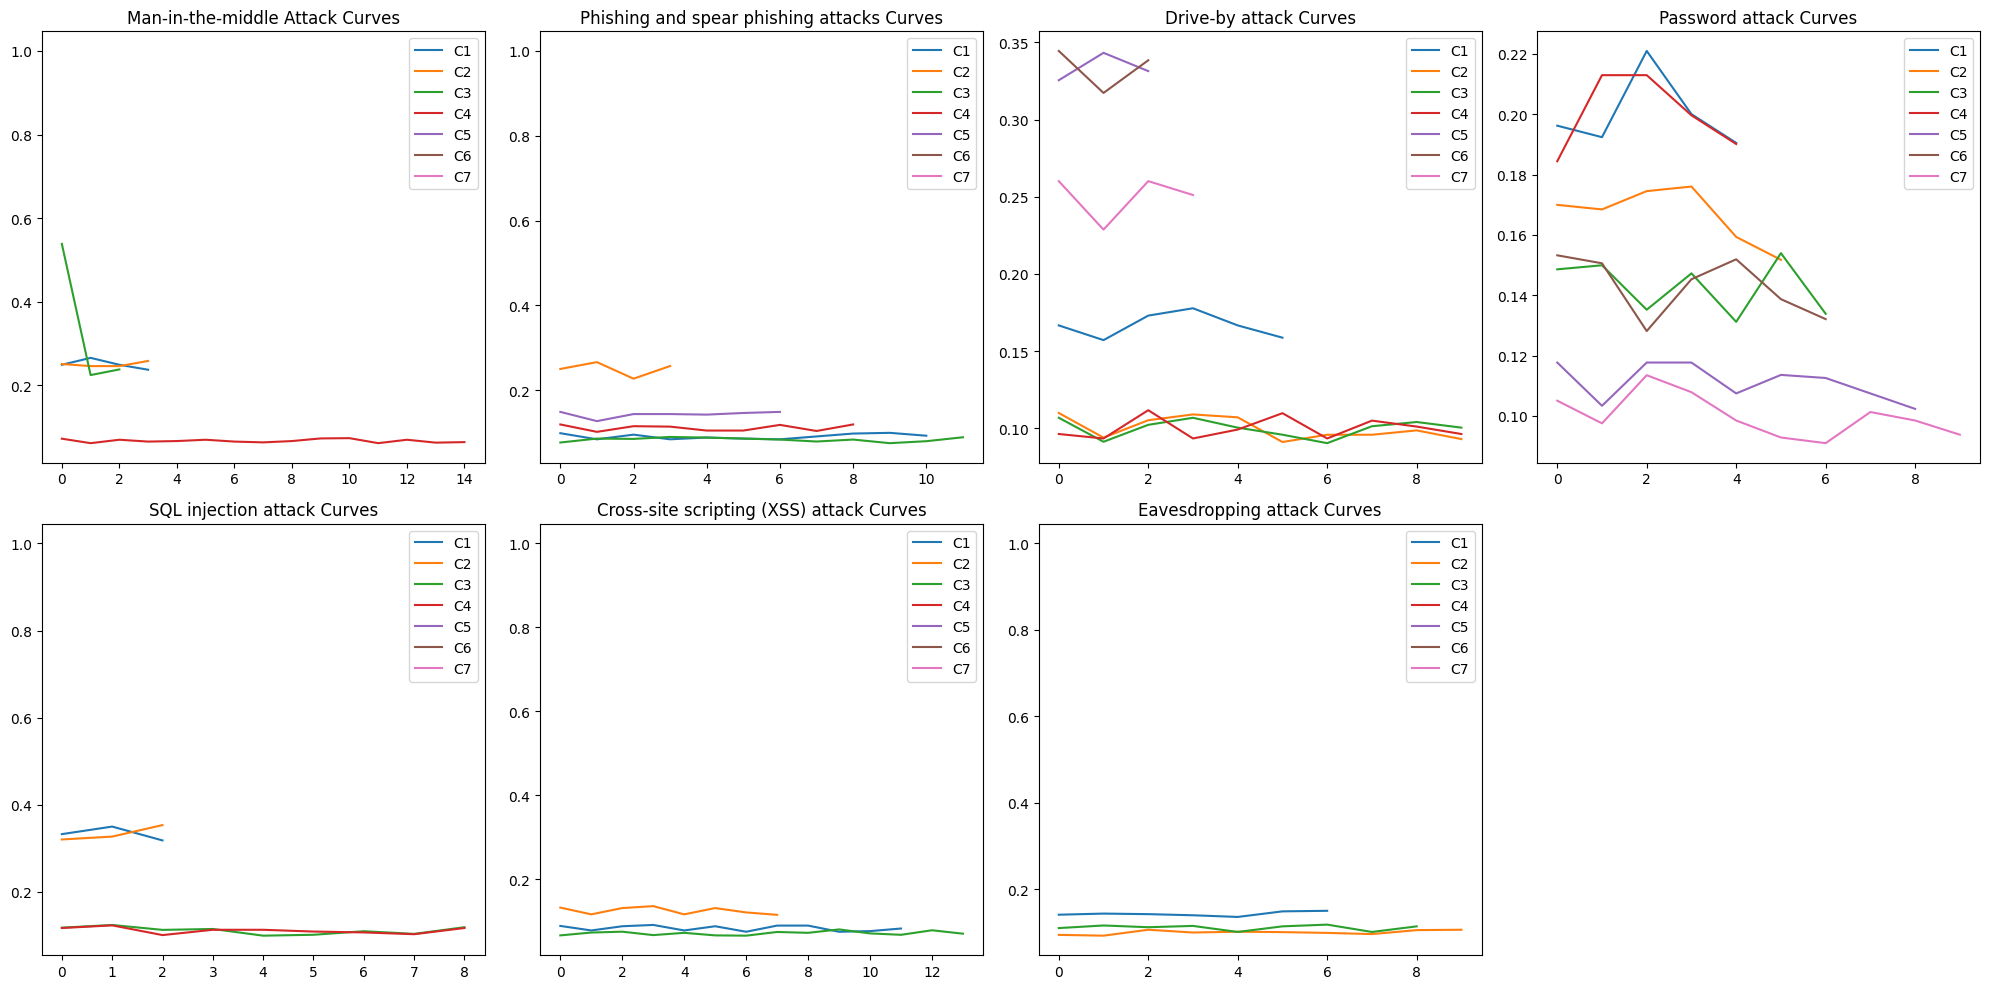

In [45]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))  
axs = axs.flatten()  
for i in range(7):
  ax = axs[i]
  ax.plot(data.iloc[i]['C1'], label='C1')
  ax.plot(data.iloc[i]['C2'], label='C2')
  ax.plot(data.iloc[i]['C3'], label='C3')
  ax.plot(data.iloc[i]['C4'], label='C4')
  ax.plot(data.iloc[i]['C5'], label='C5')
  ax.plot(data.iloc[i]['C6'], label='C6')
  ax.plot(data.iloc[i]['C7'], label='C7')
  ax.set_title(data.iloc[i]['ATTACK'] + " Curves")
  ax.legend(loc='upper right')

fig.delaxes(axs[7])
plt.tight_layout()
plt.show()


In [46]:
urls = pd.read_csv('./UnifiedResourceLocators.csv')

In [47]:
urls

,site
0,IPid?x25/FDDI
1,https://www.goole.com/ACK
2,https://instagram.ACK/
3,https://youtube.httpid.com/
4,http://getmonlist.google.com
5,http://getmonlist.twitter.com
6,https://instagram.GETID=?.com/
7,https://ACK.google.com
8,https://apple.ACK=?/
9,http://hp.IPid=?/


In [48]:
urls['site'] = urls['site'].str.lower()

In [49]:
urls

,site
0,ipid?x25/fddi
1,https://www.goole.com/ack
2,https://instagram.ack/
3,https://youtube.httpid.com/
4,http://getmonlist.google.com
5,http://getmonlist.twitter.com
6,https://instagram.getid=?.com/
7,https://ack.google.com
8,https://apple.ack=?/
9,http://hp.ipid=?/


In [50]:
urls['site'] = urls['site'].apply(lambda url: re.findall('[a-zA-Z-0-9]+', url))
print(urls['site'])

0                                     [ipid, x25, fddi]
1                         [https, www, goole, com, ack]
2                               [https, instagram, ack]
3                         [https, youtube, httpid, com]
4                       [http, getmonlist, google, com]
5                      [http, getmonlist, twitter, com]
6                        [https, instagram, getid, com]
7                             [https, ack, google, com]
8                                   [https, apple, ack]
9                                      [http, hp, ipid]
10                      [http, actcorp, com, x25, auth]
11                 [https, www, facebook, com, x25, id]
12    [https, cyber-hacking-breaches, web, app, cybe...
13                   [http, www, google, com, hp, ipid]
14                             [https, www, goole, com]
15                         [https, www, greatsite, com]
16                               [https, facebook, com]
17                         [https, www, instagra

In [51]:
urls['site'] = urls['site'].apply(lambda vec: [np.array(vectorize(token)) for token in vec])

ipid
x25
fddi
https
www
goole
com
ack
https
instagram
ack
https
youtube
httpid
com
http
getmonlist
google
com
http
getmonlist
twitter
com
https
instagram
getid
com
https
ack
google
com
https
apple
ack
http
hp
ipid
http
actcorp
com
x25
auth
https
www
facebook
com
x25
id
https
cyber-hacking-breaches
web
app
cyber-security-hacking-breaches-data-home-page
tcpoffset
http
www
google
com
hp
ipid
https
www
goole
com
https
www
greatsite
com
https
facebook
com
https
www
instagram
com
https
google
earth
portid
com
https
google
earth
portid
https
cyber-hacking-breaches
web
app
cyber-security-hacking-breaches-data
https
apple
com
ack
serverid
http
localhost
3000
cyber-security-hacking-breac
00
cyber-security-hacking-breaches-data-home-page
https
www
google
com
https
facebook
x25
ack
https
cyber-hacking-breaches
web
app
cyber-security-hacking-breaches-data-home-page
https
modeling
and
predicting
cyber
hackingand
breaches
https
www
google
com
rohit30
https
www
google
com
https
google
cp


In [52]:
urls.iloc[0]

site    [[0.24881516587677724, 0.26540284360189575, 0....
Name: 0, dtype: object

In [53]:
df = pd.DataFrame(urls)
df.to_csv('./urls_vec.csv', index=False)

In [ ]:
# Site-curve(1) should be over-lapped with the curves of attack(i)
# 1 -> n (mapping)

In [54]:
site_curve_1 = urls.iloc[0][0]

for word_vec in site_curve_1:
  print(word_vec)

[0.24881517 0.26540284 0.24881517 0.23696682]
[0.53811659 0.22421525 0.23766816]
[0.25061425 0.24570025 0.24570025 0.25798526]


C:\Users\rohit\AppData\Local\Temp\ipykernel_25448\973074646.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  site_curve_1 = urls.iloc[0][0]


In [55]:
attack_1 = data.loc[0].to_numpy()
attack_1_name = attack_1[0]
attack_1_curves = attack_1[1:]
print(attack_1_name)
for curve in (attack_1_curves):
  print(curve)

Man-in-the-middle Attack
[0.24881517 0.26540284 0.24881517 0.23696682]
[0.25061425 0.24570025 0.24570025 0.25798526]
[0.53811659 0.22421525 0.23766816]
[0.07192429 0.06119874 0.06940063 0.06498423 0.06624606 0.06940063
 0.06498423 0.06309148 0.06624606 0.07255521 0.07318612 0.06119874
 0.06940063 0.06246057 0.0637224 ]
[1.]
[1.]
[1.]


In [ ]:
# Initial analysis

In [56]:
for curve in (attack_1_curves):
  print(curve)

[0.24881517 0.26540284 0.24881517 0.23696682]
[0.25061425 0.24570025 0.24570025 0.25798526]
[0.53811659 0.22421525 0.23766816]
[0.07192429 0.06119874 0.06940063 0.06498423 0.06624606 0.06940063
 0.06498423 0.06309148 0.06624606 0.07255521 0.07318612 0.06119874
 0.06940063 0.06246057 0.0637224 ]
[1.]
[1.]
[1.]


In [59]:
def cosine_difference(site_c, att_c):
  diff = []
  weight = 0
  for ac_ in att_c:
    for sc_ in site_c:
      if np.any(ac_ == 0.0) or np.any(ac_== 1.0):
        continue
      local_diff = True
      for i in range(len(sc_) if len(sc_) < len(ac_) else len(ac_)):
        local_diff &= (math.ceil((math.pow(math.log(sc_[i], 2), 2))) - math.ceil(math.pow(math.log(ac_[i], 2), 2)) == 0)
      diff.append(local_diff)
      if(local_diff == True):
        weight += 1
  return weight

In [60]:
res = cosine_difference(site_curve_1, attack_1_curves)
print(res)

3


In [ ]:
def get_attack():
  names = []
  curves = []
  for i in range(7):
    att = data.loc[i].to_numpy()
    att_name = att[0]
    att_curves = att[1:]
    names.append(att_name)
    curves.append(att_curves)
  return (names, curves)
